In [4]:
from processimage import process_image

In [5]:
from PIL import Image
import base64
import json
from io import BytesIO

In [13]:
def pil_to_b64(im, enc_format="png", **kwargs):
    buff = BytesIO()
    im.save(buff, format=enc_format, **kwargs)
    return base64.b64encode(buff.getvalue()).decode("utf-8")

In [12]:

def b64_to_pil(string):
    decoded = base64.b64decode(string)
    buffer = BytesIO(decoded)
    im = Image.open(buffer)

    return im

In [6]:
im = Image.open("/Users/d_rc/data_playground/sample_data/iz181207d0_C1V1_2x1000x.jpg")

In [6]:
import io

In [10]:
base = "/Users/d_rc/data_playground/origs/"
img_paths = [base + name for name in os.listdir(base)]
img_paths

['/Users/d_rc/data_playground/origs/7iz190205-SZ60-zv15x_19.jpg',
 '/Users/d_rc/data_playground/origs/7iz190205-SZ60-zv15x_18.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60-zv15x_29.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60-zv15x_28.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60-zv15x_19.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60-zv15x_25.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60-zv15x_31.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60-zv15x_30.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60-zv15x_24.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60-zv15x_32.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60-zv15x_26.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60-zv15x_27.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60-zv15x_33.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60-zv15x_23.jpg',
 '/Users/d_rc/data_playground/origs/207iz190205-SZ60

In [11]:
ims = [Image.open(im) for im in img_paths]

In [14]:
ims_b64s = [pil_to_b64(im) for im in ims] 

In [15]:
results = [ process_image.send(im) for im in ims_b64s]

result

In [9]:
result.message_id

'cef6da7c-0843-441d-a972-78068d3a608c'

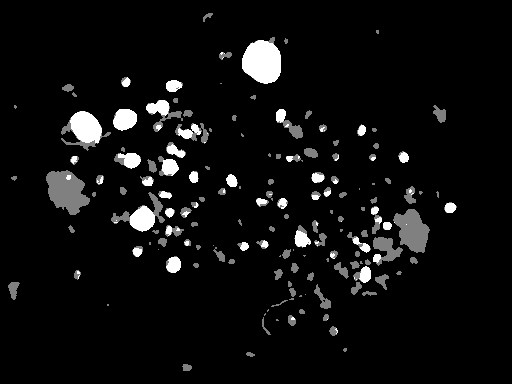

In [11]:
b64_to_pil(json.loads(result.get_result())["mask"])

In [33]:
i = 0
all = []
for res in results:
    #print(res.message_id)
    rr = json.loads(res.get_result())
    rr.pop('mask', None)
    rr.pop('umap', None)
    rr['name'] = os.path.basename(img_paths[i])
    all.append(rr)
    print(rr)
    i+=1

{'count': 73.0, 'countplusminus': 12.0, 'countplusminusrelative': 0.1643835616438356, 'countdecision': 'check', 'purity': 0.3101822045517758, 'purityplusminus': 0.011714236282012513, 'purityplusminusrelative': 0.037765661956462, 'puritydecision': 'ok', 'volume': 375141.5238410233, 'volumeplusminus': 27893.881983588682, 'volumeplusminusrelative': 0.07435562370698663, 'volumedecision': 'ok', 'name': '7iz190205-SZ60-zv15x_19.jpg'}
{'count': 62.5, 'countplusminus': 1.0, 'countplusminusrelative': 0.016, 'countdecision': 'ok', 'purity': 0.4436686980189294, 'purityplusminus': 0.09332981752517117, 'purityplusminusrelative': 0.2103592566748741, 'puritydecision': 'check', 'volume': 789554.6243460486, 'volumeplusminus': 54217.371416095295, 'volumeplusminusrelative': 0.06866829696678811, 'volumedecision': 'ok', 'name': '7iz190205-SZ60-zv15x_18.jpg'}
{'count': 42.5, 'countplusminus': 17.0, 'countplusminusrelative': 0.4, 'countdecision': 'critical', 'purity': 0.22455456845299993, 'purityplusminus': 

In [36]:
all

[{'count': 73.0,
  'countplusminus': 12.0,
  'countplusminusrelative': 0.1643835616438356,
  'countdecision': 'check',
  'purity': 0.3101822045517758,
  'purityplusminus': 0.011714236282012513,
  'purityplusminusrelative': 0.037765661956462,
  'puritydecision': 'ok',
  'volume': 375141.5238410233,
  'volumeplusminus': 27893.881983588682,
  'volumeplusminusrelative': 0.07435562370698663,
  'volumedecision': 'ok',
  'name': '7iz190205-SZ60-zv15x_19.jpg'},
 {'count': 62.5,
  'countplusminus': 1.0,
  'countplusminusrelative': 0.016,
  'countdecision': 'ok',
  'purity': 0.4436686980189294,
  'purityplusminus': 0.09332981752517117,
  'purityplusminusrelative': 0.2103592566748741,
  'puritydecision': 'check',
  'volume': 789554.6243460486,
  'volumeplusminus': 54217.371416095295,
  'volumeplusminusrelative': 0.06866829696678811,
  'volumedecision': 'ok',
  'name': '7iz190205-SZ60-zv15x_18.jpg'},
 {'count': 42.5,
  'countplusminus': 17.0,
  'countplusminusrelative': 0.4,
  'countdecision': 'cr

In [23]:
results[0].get_result()

'{"mask": "iVBORw0KGgoAAAANSUhEUgAAAgAAAAGACAAAAAD+S4VjAAAgwklEQVR4nO1d2bKlIAyMt+a/bb+ceWALEAQF9Sh0zRyRJXBNCCEgEk0MjYVAeLoRExYgWomIFnNzPW/+EREur+WXAPfzu1hcC3FtW4E/+vmn0Rl4ugF7gFYA5Jt5be8E/V1J/jeBpxuwB2xkBgBzf3WFAwrAbw95WLYN7gb5jJ3w7/IafhF4ugF7QBK4EmMKwBuAe6oZcQiYYJgCMDSGnAVMcEwBGBxTAIbGHAKGxxSAwTEFYHBMARgcUwAGxxSAwTEFYHBMARgcUwAGxxSAwTEFYHBMARgcUwAGxxSAwTEFYHBMARgcUwAGxxSAwTEFYHBMARgcUwCGxtwUOjimADwCPN0AhikADwBPN4Bhvh38NPCsQEwN8CTwdAOmADwP4NEjS6YA/ATwWM1TAJ4ALMtBpHXAY02ZAvAIHM8BovisTrghQQeCxN6YAvAYwNkLFm9S/T1L7I55VOwjELQ+xABw8ZGxUwBuBQL28kcPMxiEuYPMV7QHcwi4FeHoHvY9+LHfxhA72jhK64XpCXwAqIy7w0EwNcD9gBDK54U3C8vZj2MKwO1AJpzLq0cLayKUShzFHALuAKJrC4EdPXDcnp/7Ae4An9KfHNaRCWczVWN5ejny47jCzZsheK6mOQRcihudLCermkPAV7CuioiUOlhsCsClwG01KSJSpHTgAKYAfAlHuz9pAUDvdkwkwH2kjlU1NcBVQBBIHf2d4b80tu7kSjEF4CrAXS3rIWc8ST6mtp2jM6eBlwJu3a8jTZkYiHTvX8TkHKYAXAkEV2RynaUaLycTaFsP8n9uCLkA7oni2MrfuboaMW2AvkC6twtE0XpAz/rayM3FoM5AcCGtDfh6QOe5QCu1KQCdAbaHi23kArH9HKDw2lZhK5VpBPYDUnsKYj7k047V1wFTAHoC0ZUo7qM9Te4uw8kcAi4AomsQj